# BIA 678 - Final Project

#### Part 2

Grocery Item Popularity Analysis

Instructions:
Using the provided Instacart grocery data set, please conduct an analysis of item popularity and sales patterns. 

Requirements:

1. Import the data set into your analysis platform (Python/Pandas, R, Tableau etc.)
2. Perform exploratory data analysis to understand item categories, popularity based on number of orders, sales numbers etc. 
3. Create visualizations in Tableau to showcase findings and insights. At minimum create:
   - 3 Dashboards showcasing overall synopsis, category analysis, product details etc. 
   - 3 Storyboards highlighting key narratives - most popular items, seasonal patterns, department wise analysis etc. 
4. Write a 3 page executive summary document covering: 
   - Brief problem statement and analysis objective
   - Methodology and tools used 
   - Key insights from the analysis
   - Recommendations for Instacart based on the analysis

In [98]:
# Import packages
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_aisles = pd.read_csv('aisles.csv')
df_departments = pd.read_csv('departments.csv')
df_orders = pd.read_csv('orders.csv')
df_products = pd.read_csv('products.csv')
df_order_products = pd.read_csv('order_products__prior.csv')

In [3]:
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [4]:
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
temp = pd.merge(df_products, df_departments, on='department_id')
df_main = pd.merge(temp, df_aisles, on='aisle_id')
df_main.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,snacks,cookies cakes
2,102,Danish Butter Cookies,61,19,snacks,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,snacks,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,snacks,cookies cakes


In [9]:
def createPieChart(df, labels, count):
    temp = df[:12].copy()

    #others
    new_row = pd.DataFrame(data = {
        labels : ['others'],
        count : [df[count][12:].sum()]
    })
    temp = pd.concat([temp, new_row])

    explode = (.1, 0.1, 0, 0,0,0,0,0,0,0,0,0,.1)
    fig, ax = plt.subplots()
    ax.pie(temp[count], labels=temp[labels],
       explode=explode, autopct='%1.1f%%', pctdistance=.8, radius=1.5, 
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 1.5}, startangle=90)
    plt.show()

## Bestsellers

In [10]:
def createBarGraph(df, x, y, title, x_label, y_label):
    plt.figure(figsize=(10,6))
    plt.bar(df[x], df[y], color='blue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

In [11]:
# Group by product
merged_order_products = pd.merge(df_order_products, df_main, on='product_id')
product_count = merged_order_products.groupby(['product_id', 'product_name']).size().sort_values(ascending=False).reset_index(name='counts').head(20)

In [12]:
product_count.head(5)


,product_id,product_name,counts
0,24852,Banana,472565
1,13176,Bag of Organic Bananas,379450
2,21137,Organic Strawberries,264683
3,21903,Organic Baby Spinach,241921
4,47209,Organic Hass Avocado,213584


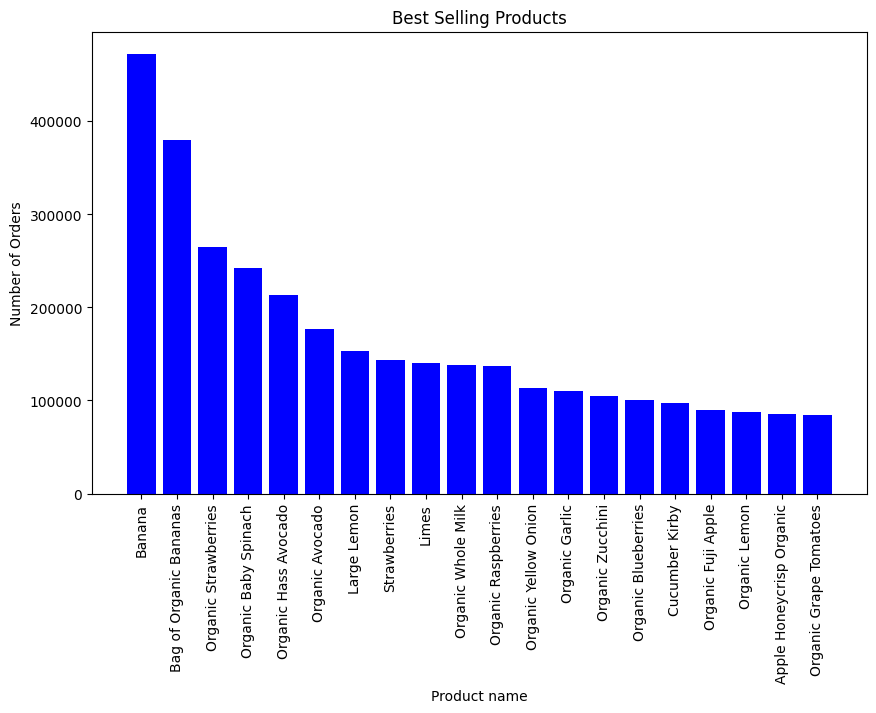

In [13]:
createBarGraph(product_count, 'product_name', 'counts', 'Best Selling Products', 'Product name', 'Number of Orders')

In [14]:
# Group by department
department_count = merged_order_products.groupby(['department_id', 'department']).size().sort_values(ascending=False).reset_index(name='counts').head(20)

In [15]:
department_count.head()

,department_id,department,counts
0,4,produce,9479291
1,16,dairy eggs,5414016
2,19,snacks,2887550
3,7,beverages,2690129
4,1,frozen,2236432


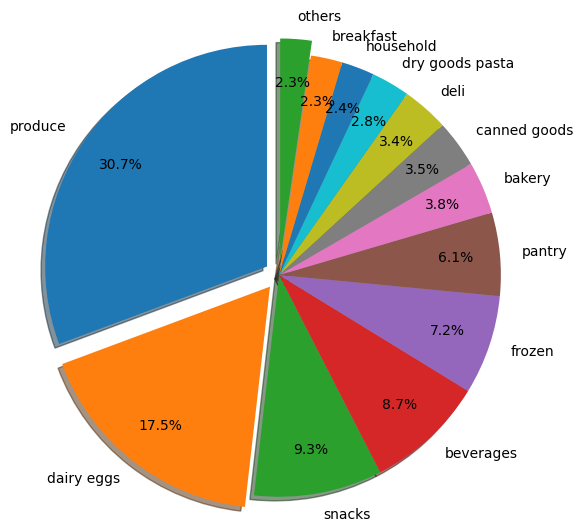

In [16]:
createPieChart(department_count.head(13), 'department', 'counts')

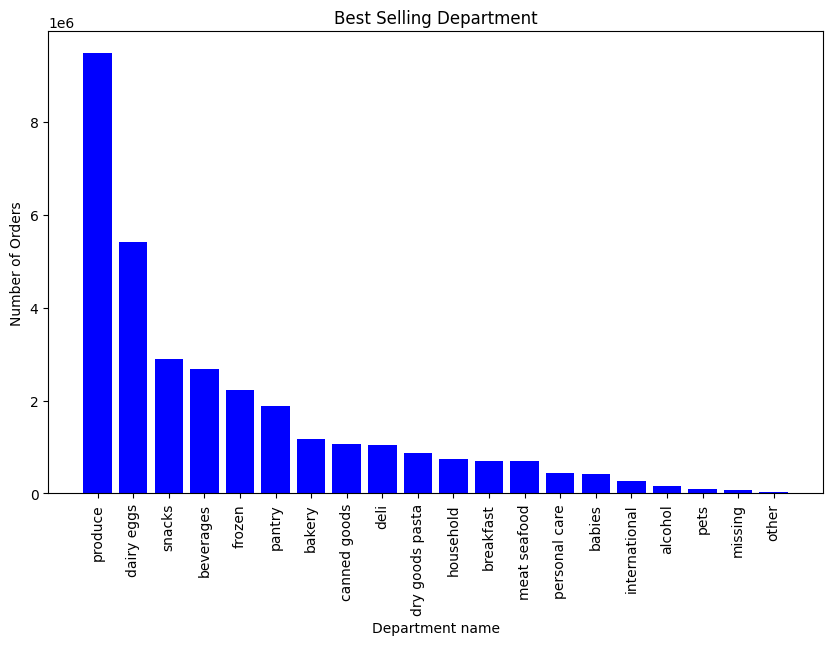

In [17]:
createBarGraph(department_count, 'department', 'counts', 'Best Selling Department', 'Department name', 'Number of Orders')

In [18]:
# Group by aisles
aisle_count = merged_order_products.groupby(['aisle_id', 'aisle']).size().sort_values(ascending=False).reset_index(name='counts').head(20)

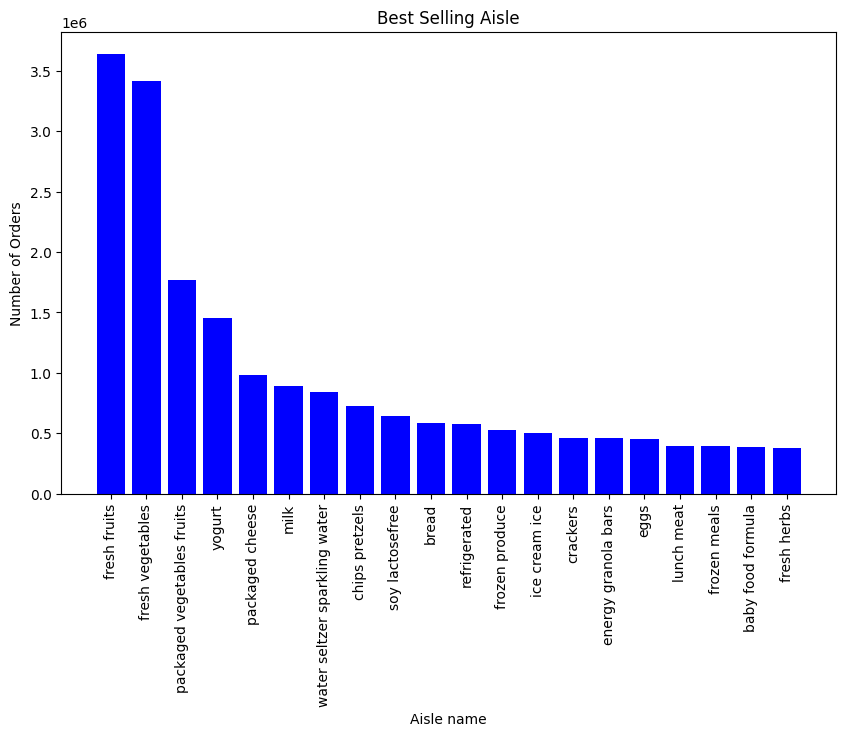

In [19]:
createBarGraph(aisle_count, 'aisle', 'counts', 'Best Selling Aisle', 'Aisle name', 'Number of Orders')

#### What did we gather?

Based on the product orders, we saw that:

1. Bananas is the most popular product amongst shoppers:
   * The product with the highest number of orders is Banana with a total of 852,015 orders (oranic and regular options combined). 
2. Organic Options Are Popular:
   * We see here that customers prefer to get organic versions of their favorite products, as such we see that the 4 out of the top 5 most popular categories are organic groceries 
3. Perishable items are most in demand: 
   * We see that the perishable items are most in demand as they are all in the top 20 best selling products.

The data suggests that fresh produce, particularly organic options, is highly favored by consumers. Bananas, both regular and organic, top the list, highlighting their popularity amongs shoppers. In addition, the appeal of organic strawberries, baby spinach, and Hass avocados also indicates a significant demand for organic and healthy food choices. This is further supported by the popularity of the department and isle as we see just how much the perishable products is much more popular than the others. this trend underscores the importance of stocking a variety of fresh produce to meet consumer demand. Additionally, the significant orders for packaged vegetables and fruits suggest that convenience is also a key factor for consumers. Dairy products, particularly yogurt and cheese, remain important components of the consumer diet, indicating the need for a diverse and well-stocked dairy section.

## Days since prior orders

In [20]:
days_since_order_count = df_orders['days_since_prior_order'].value_counts().reset_index()
days_since_order_count.columns = ['days_since_prior_order', 'count']
days_since_order_count = days_since_order_count.sort_values(by='count', ascending=False).head(20)
days_since_order_count.head()

,days_since_prior_order,count
0,30.0,369323
1,7.0,320608
2,6.0,240013
3,4.0,221696
4,3.0,217005


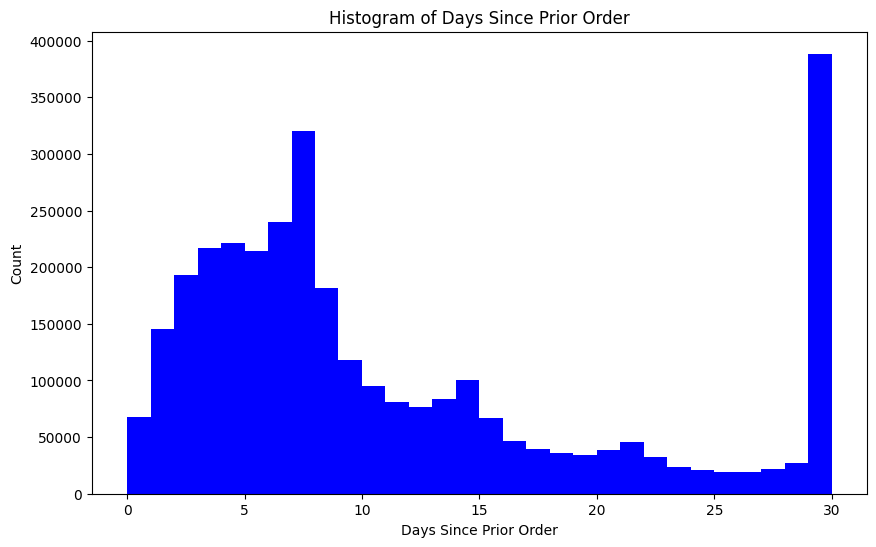

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df_orders['days_since_prior_order'], bins=30, color='blue')

plt.xlabel('Days Since Prior Order')
plt.ylabel('Count')
plt.title('Histogram of Days Since Prior Order')

# Show the plot
plt.show()

Here we see a interesting graph. Notice that most customers prefer to stick to a monthly or a weekly routine for their grocery shopping. We see that it's very similar distribution with monthly days inbetween shopping being the more popular routine, followed by weekly (7 days) and then 6 days. Surprisingly, bi weekly is not something customers often do. 

Note that there was also some investigation on what people would buy most on their monthly/weekly visit and it reflects the best sellers graphs so no interesting insights found in that. 

## What is the most popular time for users to go shopping?

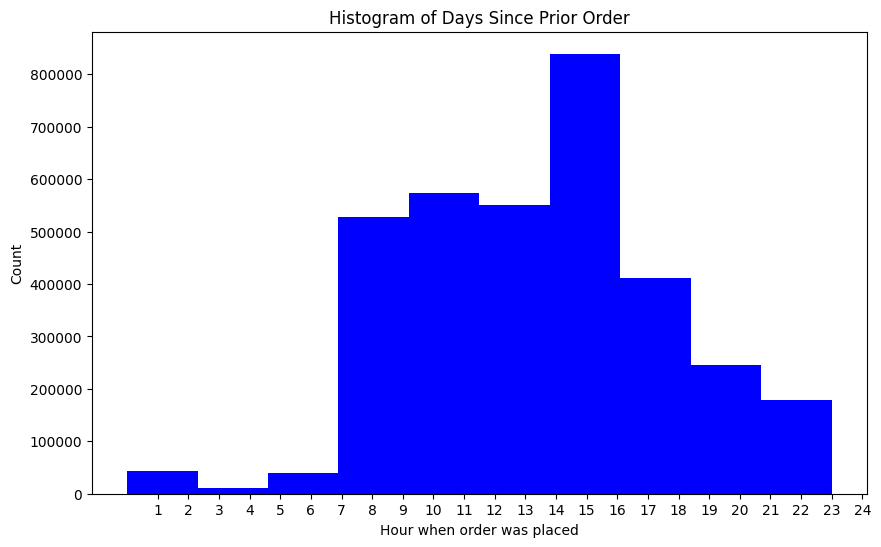

In [22]:
plt.figure(figsize=(10, 6))
bins = range(0, 24 + 2)  # +2 to include the last value

plt.hist(df_orders['order_hour_of_day'], bins=10, color='blue')

plt.xlabel('Hour when order was placed')
plt.ylabel('Count')
plt.title('Histogram of Days Since Prior Order')

plt.xticks(range(1, 24 + 1))  # Set x-ticks to be integers
# Show the plot
plt.show()

## What do people add to cart first?

In [23]:
def getAddOrderCount(df, order, section):
    df_addOrder = df[(df['add_to_cart_order'] == order)]

    df_addOrder = df_addOrder[section].value_counts().reset_index()
    df_addOrder.columns = [section, 'count']
    return df_addOrder

In [24]:
getAddOrderCount(merged_order_products, 1, 'product_name').head(10)

,product_name,count
0,Banana,110916
1,Bag of Organic Bananas,78988
2,Organic Whole Milk,30927
3,Organic Strawberries,27975
4,Organic Hass Avocado,24116
5,Organic Baby Spinach,23543
6,Organic Avocado,22398
7,Spring Water,16822
8,Strawberries,16366
9,Organic Raspberries,14393


## Instacart Categorical Distribution

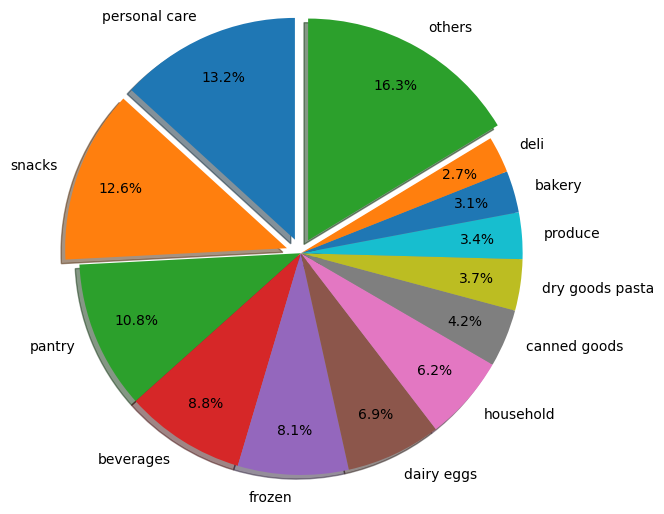

In [25]:
department_counts = df_main['department'].value_counts().reset_index()
department_counts.columns = ['department', 'count']

createPieChart(department_counts, 'department', 'count')

## How many products are people ordering each time

In [26]:
temp = df_order_products.groupby('order_id').size().reset_index(name='product_count')
temp.head()

,order_id,product_count
0,2,9
1,3,8
2,4,13
3,5,26
4,6,3


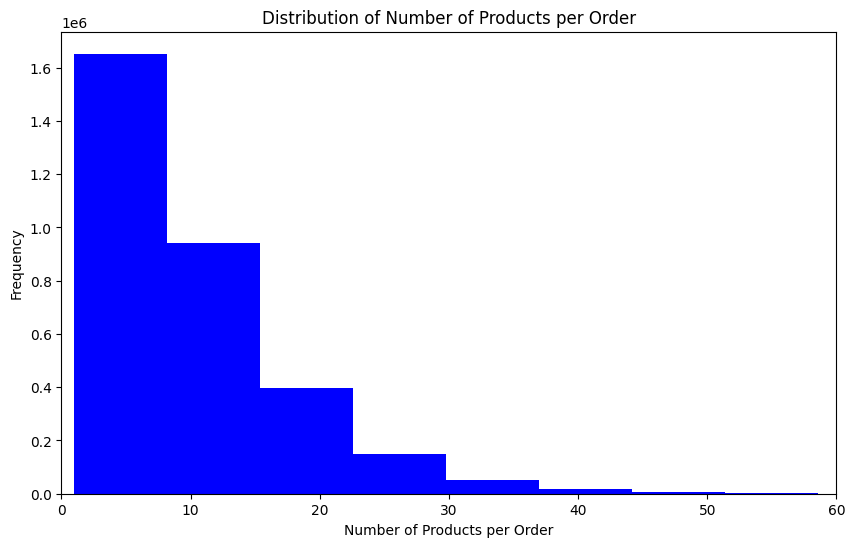

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(temp['product_count'], bins=20, color='blue')
plt.xlabel('Number of Products per Order')
plt.ylabel('Frequency')
plt.xlim(0,60)
plt.title('Distribution of Number of Products per Order')
plt.show()

## How many prior orders are there?

In [28]:
temp = pd.merge(merged_order_products, df_orders, on='order_id')
temp.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients,202279,prior,3,5,9,8.0


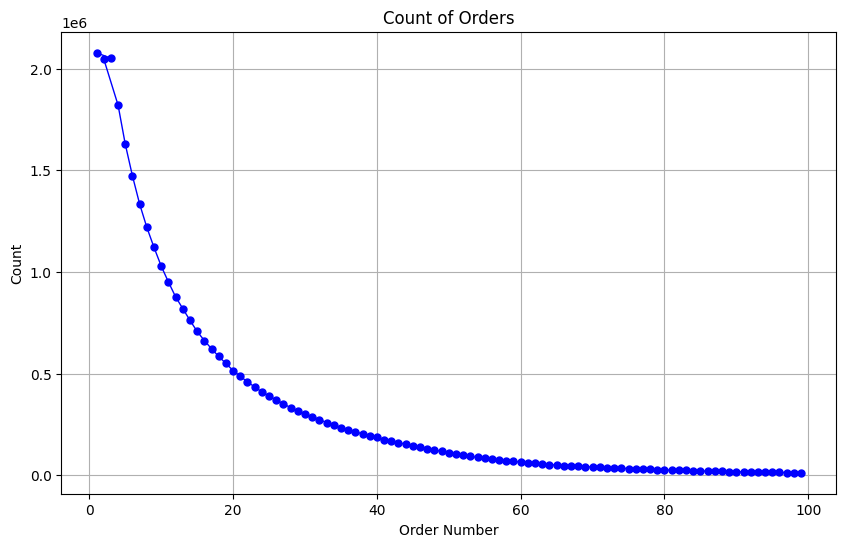

In [29]:
df_prior = temp[temp['eval_set'] == 'prior']

# Count the occurrences of order_number
order_counts = df_prior['order_number'].value_counts().reset_index()
order_counts.columns = ['order_number', 'n']

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(order_counts['order_number'], order_counts['n'], color='blue', linewidth=1, marker='o', markersize=5)
plt.xlabel('Order Number')
plt.ylabel('Count')
plt.title('Count of Orders')
plt.grid(True)
plt.show()

#### Part 3

1. Who are our customers? Define the key segments of Instacart shoppers that emerge from clustering the customer data.  

Consider behaviors, motivations, demographics, purchasing habits, lifestyle factors, and any other relevant attributes that distinguish customer groups. Identify 3-5 key segments.

2. What characterizes each segment?  

For each key customer segment identified, dive deeper into analyzing:

- Common attributes of shoppers within the cluster (age, location, household profile, etc)
- Primary motivations and purchase drivers 
- Frequency of orders, basket sizes, category preferences
- Brand affinity and loyalty patterns
- Channel and device preferences
- Price sensitivity and coupon usage  

The goal is to paint a detailed, well-rounded profile of each segment.

3. How should we engage each segment? 

For each key customer segment, provide concrete recommendations for marketing and engagement strategies based on their attributes, behaviors and motivations.

- What messages and channels will best resonate?  
- What special offers or incentives would motivate purchases?
- How can the Instacart experience be tailored to their preferences?

Use both your data analysis and creative thinking to determine how to drive deeper connections with each segment.  

4. What additional insights can Claude or Chatgpt unearth?

Leverage Claude's AI capabilities to uncover non-intuitive patterns, themes, behaviors or causal relationships related to the identified customer segments. What supplemental insights can Claude contribute beyond the student's analysis?

 For each segment, they could ask ChatGPT or Claude follow-up questions like:

- What are some defining characteristics of this customer segment? 
- What kind of purchasing patterns do they exhibit? 
- What marketing strategies might resonate most with this segment?

ChatGPT and Claude can provide additional perspective by analyzing the data patterns for each cluster and offering insights into potential motivations, behaviors, and recommendations for engaging each segment.

Some sample prompts they could give ChatGPT or Claude include:

"Based on the purchasing data for customer segment X, what appears to motivate their purchases on Instacart? Provide 2-3 hypotheses."

"For customer segment Y with [define key attributes of segment], what marketing strategies would you recommend to increase engagement?" 

"Please analyze the purchasing patterns of customer segment Z and highlight any additional insights about how to cater offerings to appeal to this group."

The goal is to enrich the analysis by leveraging ChatGPT and Claude to uncover deeper insights from the data that the students may have missed or not emphasized in their initial analysis. This allows them to better understand and engage key customer groups.

In [30]:
merged_order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,dairy eggs,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,dairy eggs,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,dairy eggs,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,dairy eggs,eggs


In [31]:
temp = df_orders.merge(df_order_products, on='order_id')
df_merged = temp.merge(df_main, on='product_id')

In [32]:
df_merged = df_merged[df_merged['eval_set'] == 'prior']

#### Recency

In [33]:
# Calculate recency as the number of days since the last order for each user
recency_df = df_merged.groupby('user_id')['days_since_prior_order'].mean().reset_index()
recency_df.columns = ['user_id', 'recency']
recency_df.head()

,user_id,recency
0,1,20.259259
1,2,15.967033
2,3,11.487179
3,4,15.357143
4,5,14.500000


#### Monetary

In [45]:
quantity = df_merged.groupby('user_id').size().reset_index(name='no_products')
print(quantity.head())

   user_id  no_products
0        1           59
1        2          195
2        3           88
3        4           18
4        5           37


In [46]:
full_orders = df_merged.merge(quantity, on='user_id', how='left')
print(full_orders.head())

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  aisle_id  department_id department        aisle  no_products  
0         Soda        77       

In [47]:
quantity_items = full_orders.groupby('user_id')['no_products'].sum().reset_index(name='monetary')
print(quantity_items.describe())

             user_id      monetary
count  206209.000000  2.062090e+05
mean   103105.000000  6.644075e+04
std     59527.555167  2.265653e+05
min         1.000000  9.000000e+00
25%     51553.000000  1.521000e+03
50%    103105.000000  6.889000e+03
75%    154657.000000  3.534400e+04
max    206209.000000  1.387562e+07


#### Frequency

In [61]:
frequency = df_merged.groupby('user_id')['order_id'].count()
frequency = frequency.reset_index()
frequency.columns = ['user_id', 'frequency']
frequency.head()

,user_id,frequency
0,1,59
1,2,195
2,3,88
3,4,18
4,5,37


In [62]:
# Merge RFM metrics into a single DataFrame
rfm = recency_df.merge(frequency, on='user_id').merge(quantity_items, on='user_id')

# Assign RFM quartiles
rfm['R_quartile'] = pd.qcut(rfm['recency'], 4, ['4','3','2','1'])
rfm['F_quartile'] = pd.qcut(rfm['frequency'].rank(method='first'), 4, ['1','2','3','4'])
rfm['M_quartile'] = pd.qcut(rfm['monetary'], 4, ['1','2','3','4'])

# Calculate RFM score
rfm['RFM_Score'] = rfm.R_quartile.astype(str) + rfm.F_quartile.astype(str) + rfm.M_quartile.astype(str)

rfm.head()

,user_id,recency,frequency,monetary,R_quartile,F_quartile,M_quartile,RFM_Score
0,1,20.259259,59,3481,2,2,2,222
1,2,15.967033,195,38025,2,4,4,244
2,3,11.487179,88,7744,3,3,3,333
3,4,15.357143,18,324,2,1,1,211
4,5,14.500000,37,1369,3,1,1,311


In [63]:
# Calculate percentiles
recency_threshold = rfm['recency'].quantile(0.90)
frequency_threshold = rfm['frequency'].quantile(0.90)
monetary_threshold = rfm['monetary'].quantile(0.90)

print(f"Recency Threshold: {recency_threshold}")
print(f"Frequency Threshold: {frequency_threshold}")
print(f"Monetary Threshold: {monetary_threshold}")

bad_customers = rfm[
    (rfm['recency'] >= recency_threshold) &
    (rfm['frequency'] <= frequency_threshold) &
    (rfm['monetary'] <= monetary_threshold)
]

print(bad_customers)

Recency Threshold: 26.097560975609756
Frequency Threshold: 386.0
Monetary Threshold: 148996.0
        user_id    recency  frequency  monetary R_quartile F_quartile  \
7             8  30.000000         49      2401          1          2   
11           12  26.169014         74      5476          1          2   
24           25  30.000000         21       441          1          1   
32           33  28.700000         53      2809          1          2   
40           41  26.314815         65      4225          1          2   
...         ...        ...        ...       ...        ...        ...   
206169   206170  26.113208         67      4489          1          2   
206171   206172  28.100000         28       784          1          1   
206172   206173  30.000000         18       324          1          1   
206187   206188  27.307692         63      3969          1          2   
206202   206203  29.103093        119     14161          1          3   

       M_quartile RFM_Score  

#### Normalize the RFM

In [64]:
scaler = StandardScaler()

In [65]:
rfm_normalized = rfm[['recency', 'frequency', 'monetary']]
rfm_normalized = scaler.fit_transform(rfm_normalized)
rfm_normalized = pd.DataFrame(rfm_normalized)
rfm_normalized.head()


,0,1,2
0,0.664536,-0.481321,-0.277889
1,0.069007,0.184668,-0.125420
2,-0.552554,-0.339308,-0.259073
3,-0.015613,-0.682097,-0.291823
4,-0.134538,-0.589054,-0.287210


[370322.70615242654, 228145.91356135975, 158385.00706322378, 124850.99661165892, 97677.36165405797, 78799.28059761124, 67497.22382892344, 57903.54291209088, 51506.45996736195]


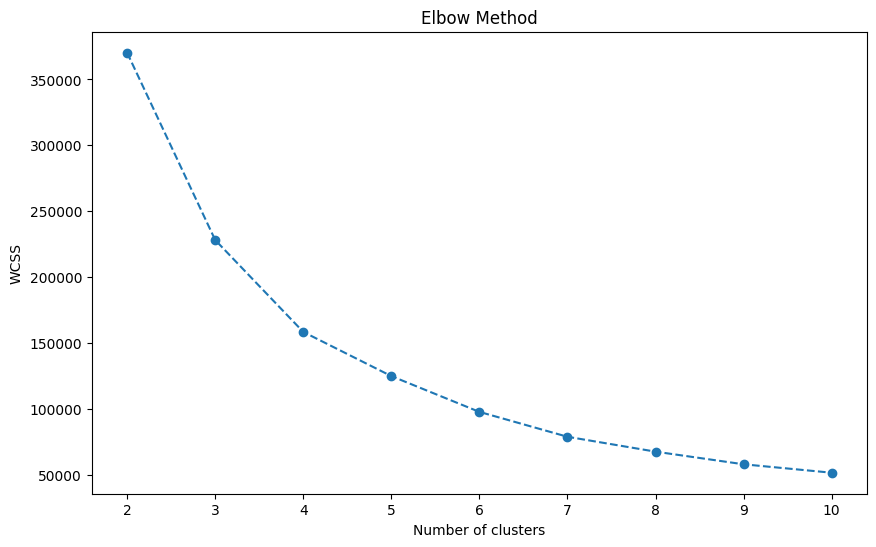

In [66]:
ssd = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=42)
    kmeans.fit(rfm_normalized)
    ssd.append(kmeans.inertia_)

print(ssd)
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), ssd, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
rfm_normalized.columns = ['recency', 'frequency', 'monetary']

In [68]:
kmeans = KMeans(n_clusters=4, max_iter=300, n_init=10, random_state=42)
kmeans.fit(rfm_normalized)
rfm_normalized.loc[:,'user_id'] = rfm['user_id']
rfm_normalized.head()

,recency,frequency,monetary,user_id
0,0.664536,-0.481321,-0.277889,1
1,0.069007,0.184668,-0.125420,2
2,-0.552554,-0.339308,-0.259073,3
3,-0.015613,-0.682097,-0.291823,4
4,-0.134538,-0.589054,-0.287210,5


In [69]:
rfm_normalized['cluster'] = kmeans.labels_

#### Monetary vs recency Cluster

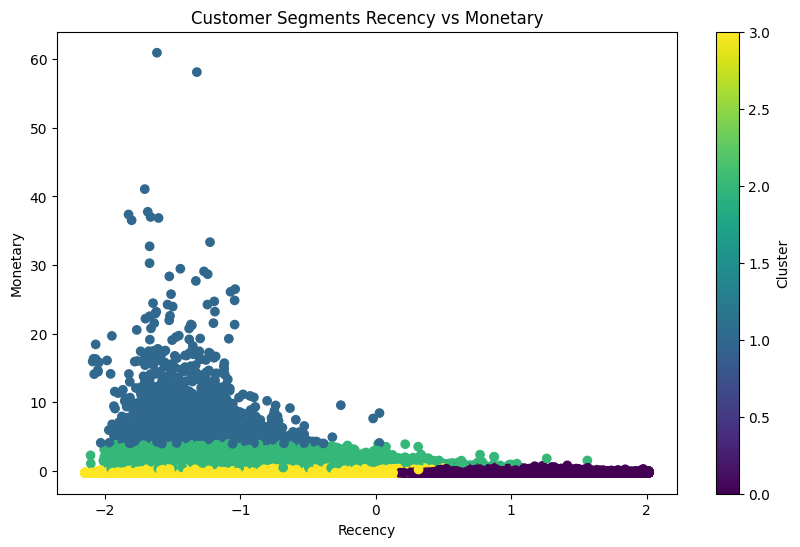

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(rfm_normalized['recency'], rfm_normalized['monetary'], c=rfm_normalized['cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Customer Segments Recency vs Monetary')
plt.colorbar(label='Cluster')
plt.show()

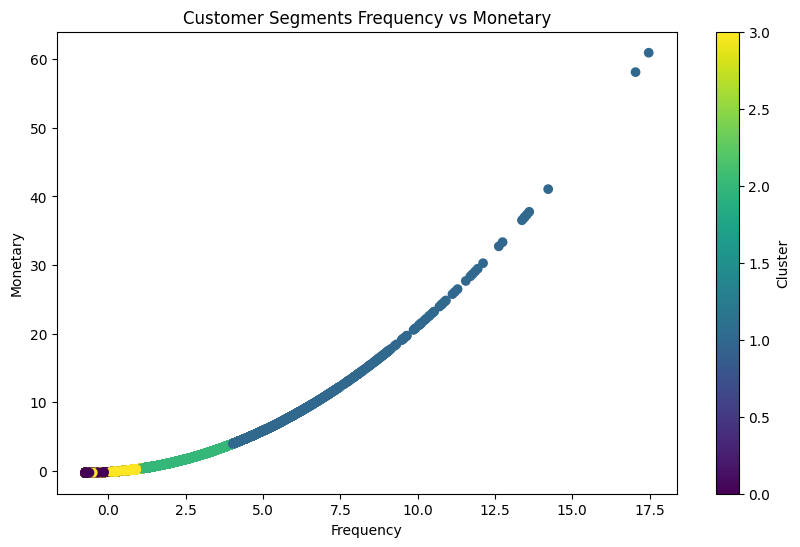

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(rfm_normalized['frequency'], rfm_normalized['monetary'], c=rfm_normalized['cluster'], cmap='viridis')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Customer Segments Frequency vs Monetary')
plt.colorbar(label='Cluster')
plt.show()

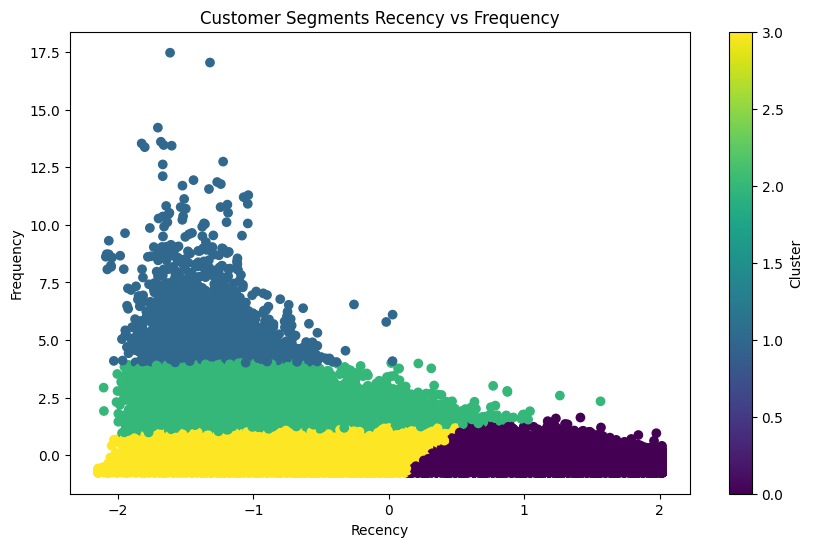

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(rfm_normalized['recency'], rfm_normalized['frequency'], c=rfm_normalized['cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Customer Segments Recency vs Frequency')
plt.colorbar(label='Cluster')
plt.show()

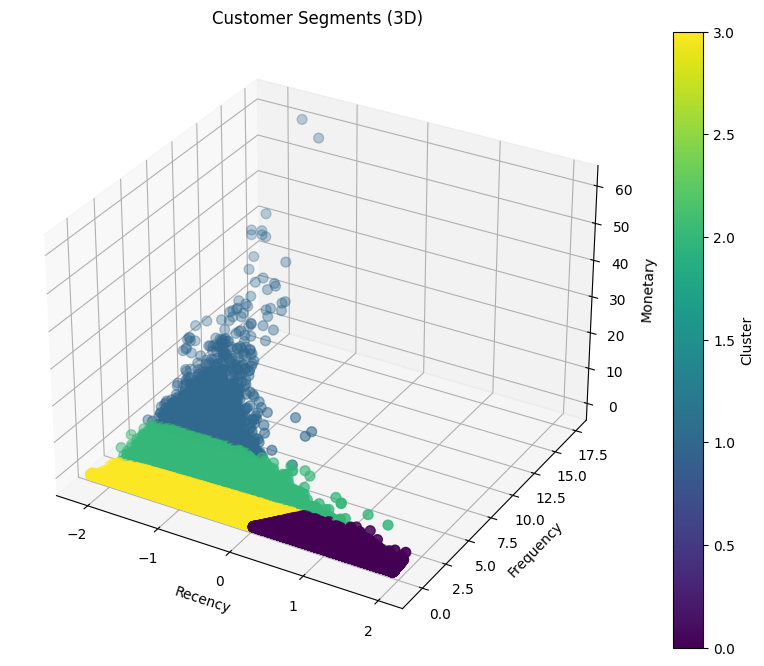

In [73]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(rfm_normalized['recency'], rfm_normalized['frequency'], rfm_normalized['monetary'], 
                c=rfm_normalized['cluster'], cmap='viridis', s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_title('Customer Segments (3D)')
ax.set_zlabel('Monetary')
plt.colorbar(sc, ax=ax, label='Cluster')
plt.show()

#### Segmenting by departments

In [151]:
user_by_department_df = pd.crosstab(df_merged['user_id'], df_merged['department'])
user_by_department_df.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,13,3,0,0,13,0,0,...,2,0,0,0,0,1,0,0,5,22
2,0,0,2,9,3,0,1,48,21,0,...,0,3,1,0,0,11,1,0,36,42
3,0,0,0,3,0,0,0,21,2,4,...,1,0,0,0,0,4,0,0,38,9
4,2,0,2,3,0,0,1,0,2,0,...,2,0,0,0,0,0,0,0,2,1
5,0,0,0,0,0,0,1,8,1,1,...,0,2,0,0,0,2,0,0,19,1


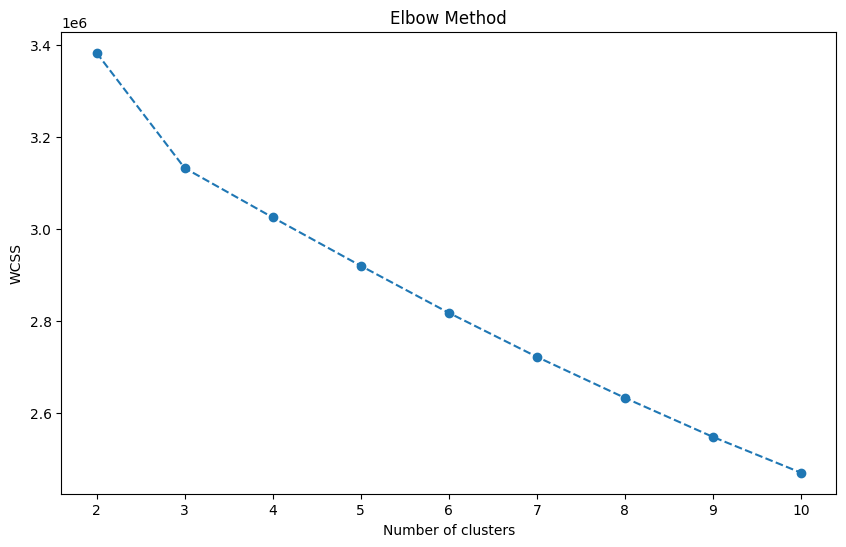

In [152]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(user_by_department_df)
scaled_df = pd.DataFrame(scaled_df)


# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

# Plot the SSE to find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

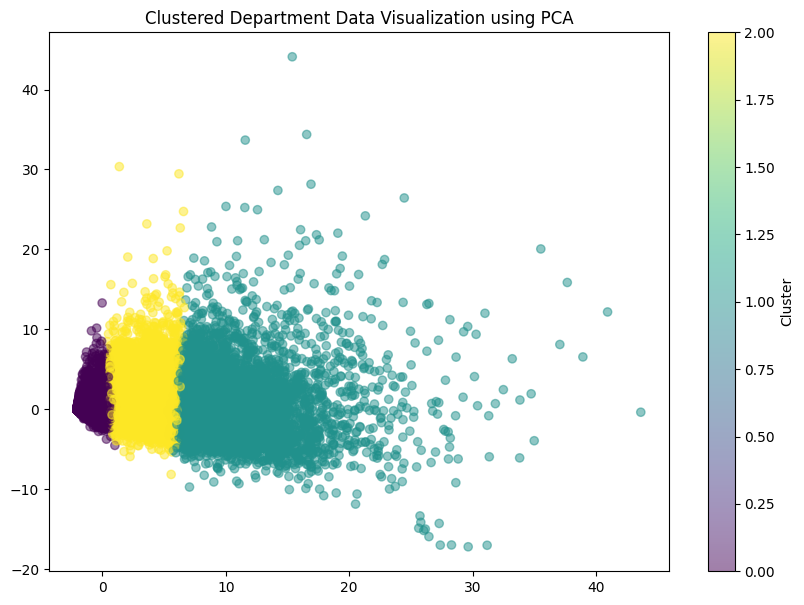

In [176]:
# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca.fit(user_by_department_df)
pca_samples = pca.transform(user_by_department_df)
ps = pd.DataFrame(pca_samples)
ps.head()

# Plot the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis', alpha=0.5)
plt.title('Clustered Department Data Visualization using PCA')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [186]:
kmeans = KMeans(n_clusters=5, max_iter=300, random_state=42, n_init=10)
kmeans.fit_predict(ps)

array([3, 0, 3, ..., 0, 2, 3], dtype=int32)

In [187]:
user_by_department_df['cluster'] = kmeans.labels_
user_by_department_df.head(20)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,13,3,0,0,13,0,0,...,0,0,0,0,1,0,0,5,22,3
2,0,0,2,9,3,0,1,48,21,0,...,3,1,0,0,11,1,0,36,42,0
3,0,0,0,3,0,0,0,21,2,4,...,0,0,0,0,4,0,0,38,9,3
4,2,0,2,3,0,0,1,0,2,0,...,0,0,0,0,0,0,0,2,1,3
5,0,0,0,0,0,0,1,8,1,1,...,2,0,0,0,2,0,0,19,1,3
6,0,0,0,0,0,0,3,2,0,0,...,0,2,0,0,1,0,0,6,0,3
7,0,0,5,51,0,0,6,32,13,0,...,0,8,0,0,9,0,1,57,19,0
8,0,0,0,0,0,0,5,12,0,1,...,1,0,0,0,3,0,0,27,0,3
9,0,6,4,8,3,0,1,24,3,0,...,0,1,0,0,4,0,0,7,13,3


In [190]:
c0 = user_by_department_df[user_by_department_df['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_by_department_df[user_by_department_df['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_by_department_df[user_by_department_df['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_by_department_df[user_by_department_df['cluster']==3].drop('cluster',axis=1).mean()
c4 = user_by_department_df[user_by_department_df['cluster']==4].drop('cluster',axis=1).mean()



In [191]:
c0.sort_values(ascending=False)[0:10]

department
produce            69.442309
dairy eggs         40.312765
snacks             20.942133
beverages          19.576886
frozen             17.315878
pantry             14.100751
bakery              8.792387
canned goods        8.201737
deli                7.949765
dry goods pasta     6.605843
dtype: float64

In [192]:
c1.sort_values(ascending=False)[0:10]

department
produce            392.743460
dairy eggs         170.417245
snacks              72.699413
frozen              52.952750
pantry              52.171116
beverages           50.602242
bakery              34.573946
canned goods        31.615590
deli                31.454084
dry goods pasta     25.984250
dtype: float64

In [193]:
c2.sort_values(ascending=False)[0:10]

department
produce            186.256536
dairy eggs          77.900636
snacks              32.430806
frozen              27.601165
beverages           26.688492
pantry              26.591122
canned goods        16.526873
bakery              15.854481
deli                15.634363
dry goods pasta     12.683508
dtype: float64

In [194]:
c3.sort_values(ascending=False)[0:10]

department
produce         14.910817
dairy eggs       9.734140
beverages        6.572198
snacks           6.069382
frozen           5.134636
pantry           4.068954
bakery           2.372315
canned goods     2.192786
household        2.180258
deli             2.044556
dtype: float64

In [195]:
c4.sort_values(ascending=False)[0:10]

department
dairy eggs    162.745920
produce       121.562139
snacks        108.306804
beverages      94.953302
frozen         51.606076
pantry         37.718554
bakery         31.712026
deli           24.630178
breakfast      23.135576
household      18.289480
dtype: float64